## Support Vector Machine (SVM)

In this notebook, we will train a SVM model on the IMDb movie reviews dataset and evaluate its performance.




### 1. Loading the Dataset

In [2]:
import pandas as pd

# Load train dataset
train_df = pd.read_csv('data/train_set.csv')
print(train_df.head())

X_train = train_df['text']
y_train = train_df['sentiment']

# Load test dataset
test_df = pd.read_csv('data/test_set.csv')
print(test_df.head())

X_test = test_df['text']
y_test = test_df['sentiment']

                                                text  sentiment
0  clint eastwood play wound union soldier find g...          1
1  rent movie sound pretty interesting horror mov...          0
2  great example could great film great idea turn...          0
3  ok admit watch movie mystery science theater 3...          0
4  movie absolutely terrible not act awful sleep ...          0
                                                text  sentiment
0  attack killer tomato parody bad monster movie ...          0
1  pam grier star coffy nurse seek revenge drug d...          0
2  movie never imagine richard attenborough could...          1
3  patricia hunter oh professor also make habit c...          0
4  go generous give 3 live huntsville great see w...          0


### 2. Feature Extraction

This section of code performs feature extraction for text data using two different techniques: Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency). The goal is to convert raw text data into numerical features that can be used by machine learning models for sentiment analysis.

Technique 1: Bag of Words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# ngram_range to capture phrases for sentiment, especially negatations
# min_df removes extremely rare words in less than 2 reviews
# max_df removes words that appear in more than 90% of reviews; likely corpus-specific stopwords (eg. movies, films) that may not help distinguish sentiments

bow_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)

# Fit and transform the training data
X_train_BoW = bow_vectorizer.fit_transform(X_train)
X_test_BoW = bow_vectorizer.transform(X_test)

Technique 2: Term Frequency - Inverse Document Frequency (TF-IDF)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ngram_range to capture phrases for sentiment, especially negatations
# min_df removes extremely rare words in less than 2 reviews
# max_df removes words that appear in more than 90% of reviews; likely corpus-specific stopwords (eg. movies, films) that may not help distinguish sentiments

vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### 3. Hyperparameter Tuning and Cross-Validation (for SVM)

In [9]:
from sklearn.model_selection import train_test_split

# Create samples
sample_frac = 0.05
X_train_bow_sample, _, y_train_bow_sample, _ = train_test_split(X_train_BoW, y_train, train_size=sample_frac, random_state=42)
X_train_vec_sample, _, y_train_vec_sample, _ = train_test_split(X_train_vec, y_train, train_size=sample_frac, random_state=42)

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Initialise stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

1. Hyperparameter tuning on BoW training samples

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc1 = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]  # for 'poly' kernel
}

gs1 = GridSearchCV(estimator = svc1, param_grid = param_grid, scoring = 'accuracy', cv=cv)

gs1.fit(X=X_train_bow_sample, y=y_train_bow_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [13]:
print(gs1.best_score_)

0.82


In [15]:
print(gs1.best_params_)

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}


To address the limitations of the studies we reviewed, we performed hyperparameter tuning to identify the optimal parameters for the SVM model (using BoW), with the goal of maximizing accuracy in sentiment classification. By applying GridSearchCV to X_train_bow_sample, we found that the best kernel to use is the linear kernel. Since the linear kernel only requires tuning the C parameter, the optimal value for C was found to be 0.1.

2. Hyperparameter tuning on TF-IDF training samples

In [12]:
svc2 = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]  # for 'poly' kernel
}

gs2 = GridSearchCV(estimator = svc2, param_grid = param_grid, scoring = 'accuracy', cv=cv)

gs2.fit(X=X_train_vec_sample, y=y_train_vec_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [14]:
print(gs2.best_score_)

0.8424999999999999


In [16]:
print(gs1.best_params_)

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}


Similarly, to address the limitations of the studies we reviewed, we performed hyperparameter tuning to identify the optimal parameters for the SVM model (using TF-IDF), with the goal of maximizing accuracy in sentiment classification. By applying GridSearchCV to X_train_vec_sample, we found that the best kernel to use is the linear kernel. Since the linear kernel only requires tuning the C parameter, the optimal value for C was found to be 0.1, which is similar to the SVM model (using BoW).

### 4. Model Training (SVM)

In this section, using the parameters tuned, final models are trained on the full training data (for both BoW and TF-IDF).

In [17]:
# Fit linear SVM to BoW training data
bow_svc = SVC(kernel='linear', C=0.1)
bow_svc.fit(X_train_BoW, y_train)

SVC(C=0.1, kernel='linear')

In [18]:
# Fit linear SVM to TF-IDF training data
vec_svc = SVC(kernel='linear', C=0.1)
vec_svc.fit(X_train_vec, y_train)

SVC(C=0.1, kernel='linear')

### 5. Model Evaluation (on test set)

In this section, final models are evaluated on the test set for classification performance using classification report and confusion matrix.

Test Accuracy: 0.8979
--------------------------------------------------

BoW Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix:


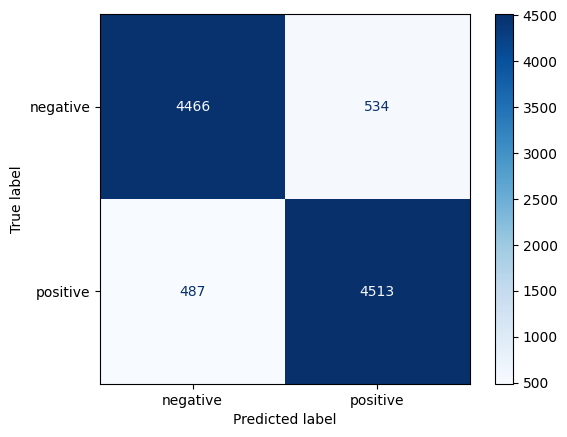

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# BoW evaluation
y_pred_bow = bow_svc.predict(X_test_BoW)

# Compute train and test accuracy
test_accuracy = accuracy_score(y_test, y_pred_bow)

# Print train and test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")
print("-" * 50)

# Classification report for BoW
print("\nBoW Classification Report:")
print(classification_report(y_test, y_pred_bow, target_names=["negative", "positive"]))
print(f"\n{'='*40}")

# Confusion matrix visualization
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_bow)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Test Accuracy: 0.8803
--------------------------------------------------

TF-IDF Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.85      0.88      5000
    positive       0.86      0.91      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:


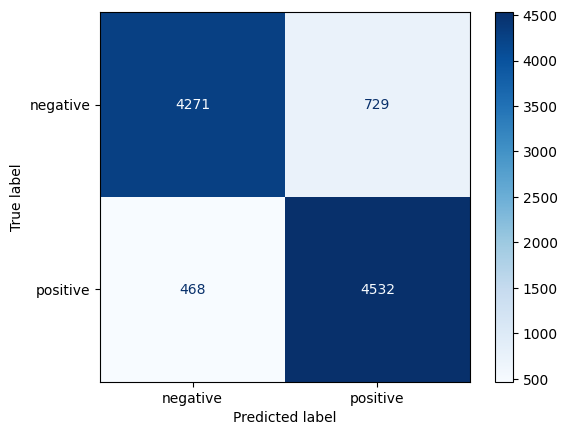

In [22]:
# TF-IDF evaluation
y_pred_vec = vec_svc.predict(X_test_vec)

# Compute train and test accuracy
test_accuracy = accuracy_score(y_test, y_pred_vec)

# Print train and test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")
print("-" * 50)

# Classification report for TF-IDF
print("\nTF-IDF Classification Report:")
print(classification_report(y_test, y_pred_vec, target_names=["negative", "positive"]))
print(f"\n{'='*40}")

# Confusion matrix visualization
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_vec)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The evaluation of the two SVM variants reveals that that BoW representation outperforms TF-IDF across all key performance metrics—accuracy, precision, recall, and F1-score. BoW consistently achieves around 90% on the unseen test set, whereas TF-IDF trails slightly behind with scores averaging around 88%.

This performance gap may stem from the way TF-IDF down-weights frequently occurring terms, potentially penalizing sentiment-rich words too harshly. In contrast, BoW retains raw frequency, allowing the model to leverage those high-frequency sentiment-bearing words that are crucial in sentiment classification. As a result, SVM with BoW may learn decision boundaries better because it gets stronger signals from frequently occurring yet sentiment-heavy words. Additionally, TF-IDF may dilute the strength of important n-grams (eg. “not good” or “very bad”) by assigning lower weights to commonly occurring word combinations. BoW does not penalise these n-grams, allowing SVM to pick up stronger signals from negations and intensifiers.